# ОНПД. Лабораторна робота №4

In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [106]:
old_data = pd.read_csv("weather_features.csv")

In [107]:
a = old_data.loc[:140000]
a.to_csv("trn_data.csv")

b = old_data.loc[140000:]
b.to_csv("tst_data.csv")

In [108]:
mydata = pd.read_csv("trn_data.csv")

In [109]:
#перші 5 рядків
mydata.head()

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [110]:
#останні 5 рядків
mydata.tail()

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
139996,139996,2018-09-07 13:00:00+02:00,Barcelona,298.65,298.15,299.15,1017,61,3,170,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
139997,139997,2018-09-07 14:00:00+02:00,Barcelona,299.65,299.15,300.15,1016,57,3,180,0.0,0.0,0.0,40,802,clouds,scattered clouds,03d
139998,139998,2018-09-07 15:00:00+02:00,Barcelona,299.65,298.15,301.15,1016,54,4,180,0.0,0.0,0.0,20,801,clouds,few clouds,02d
139999,139999,2018-09-07 16:00:00+02:00,Barcelona,299.65,299.15,300.15,1016,57,4,170,0.0,0.0,0.0,20,801,clouds,few clouds,02d
140000,140000,2018-09-07 17:00:00+02:00,Barcelona,299.65,299.15,300.15,1016,57,5,180,0.0,0.0,0.0,20,801,clouds,few clouds,02d


In [111]:
#Розмірність набору
mydata.shape

(140001, 18)

In [112]:
# первірка повноти набору
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140001 entries, 0 to 140000
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           140001 non-null  int64  
 1   dt_iso               140001 non-null  object 
 2   city_name            140001 non-null  object 
 3   temp                 140001 non-null  float64
 4   temp_min             140001 non-null  float64
 5   temp_max             140001 non-null  float64
 6   pressure             140001 non-null  int64  
 7   humidity             140001 non-null  int64  
 8   wind_speed           140001 non-null  int64  
 9   wind_deg             140001 non-null  int64  
 10  rain_1h              140001 non-null  float64
 11  rain_3h              140001 non-null  float64
 12  snow_3h              140001 non-null  float64
 13  clouds_all           140001 non-null  int64  
 14  weather_id           140001 non-null  int64  
 15  weather_main     

In [113]:
# видалення рядків з нульовим наченням
mydata.dropna(inplace=True)

In [114]:
# друга первірка повноти набору
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140001 entries, 0 to 140000
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           140001 non-null  int64  
 1   dt_iso               140001 non-null  object 
 2   city_name            140001 non-null  object 
 3   temp                 140001 non-null  float64
 4   temp_min             140001 non-null  float64
 5   temp_max             140001 non-null  float64
 6   pressure             140001 non-null  int64  
 7   humidity             140001 non-null  int64  
 8   wind_speed           140001 non-null  int64  
 9   wind_deg             140001 non-null  int64  
 10  rain_1h              140001 non-null  float64
 11  rain_3h              140001 non-null  float64
 12  snow_3h              140001 non-null  float64
 13  clouds_all           140001 non-null  int64  
 14  weather_id           140001 non-null  int64  
 15  weather_main     

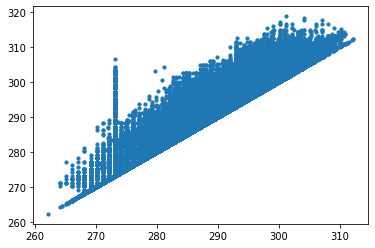

In [115]:
# графік тренувального набору даних
plt.scatter(mydata["temp_min"],mydata["temp_max"],s=10)

In [116]:
# переформатування даних набору
X = mydata["temp_min"].values.reshape(-1,1)
Y = mydata["temp_max"].values.reshape(-1,1)

In [117]:
# перші 10 значень колонки х
mydata["temp_min"].head(10)

0    270.475
1    270.475
2    269.686
3    269.686
4    269.686
5    270.292
6    270.292
7    270.292
8    274.601
9    274.601
Name: temp_min, dtype: float64

In [118]:
# зріз 10 перших елементів переформатованого набору по х
X[0:10]

array([[270.475],
       [270.475],
       [269.686],
       [269.686],
       [269.686],
       [270.292],
       [270.292],
       [270.292],
       [274.601],
       [274.601]])

In [119]:
# ділимо набір даних на тренувальні дані та дані для перехресної перевірки
from sklearn.model_selection import train_test_split
X_train,X_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3, random_state=143)

In [120]:
# навчання моделі
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
# робимо зріз перших пяти значень тренувального набору, робимо пердбачення
some_data = X_train[:5]
some_labels = y_train[:5]
print("Predictions: " ,lin_reg.predict(some_data))
print("Labels:",some_labels)

Predictions:  [[302.06807936]
 [300.12653574]
 [287.76278598]
 [291.38958946]
 [279.74032775]]
Labels: [[302.15 ]
 [300.05 ]
 [285.414]
 [292.15 ]
 [279.15 ]]


In [122]:
# обчислення середньоквадратичної помилки
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

2.9617221441559423

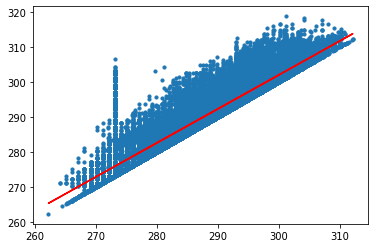

In [123]:
# графік тренувального дабору + передбачення
plt.scatter(X_train, y_train,s=10)
plt.plot(X_train, predictions, color='red')
plt.show()

In [124]:
# середньоквадратична помилка для даних перехресної перевірки
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_rmse

2.9367786606612007

In [125]:
# імпорт і переформатування тестового наботу 
data_test = pd.read_csv("tst_data.csv")
X_test = mydata["temp_min"].values.reshape(-1,1)
y_test = mydata["temp_max"].values.reshape(-1,1)

In [126]:
# середньоквадратична помилка для тестового набору
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.954261088039196

In [127]:
# обчислення функції оцінки регресії(коефіцієнт детермінації)
from sklearn.metrics import r2_score
score=r2_score(y_test, final_predictions)
score

0.8665655910124225

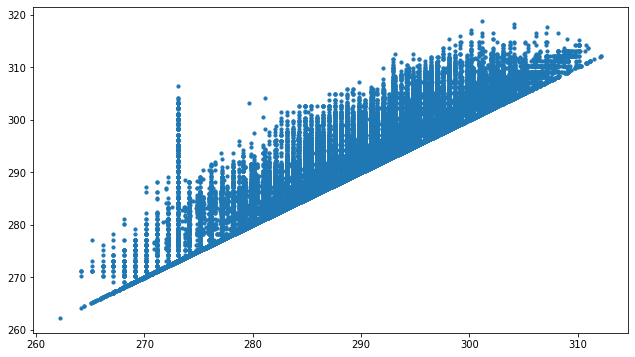

In [128]:
# графік тренувального набору
plt.figure(figsize=(10.66,6))
plt.scatter(mydata["temp_min"],mydata["temp_max"],s=10)
plt.savefig("raw_data.jpg")

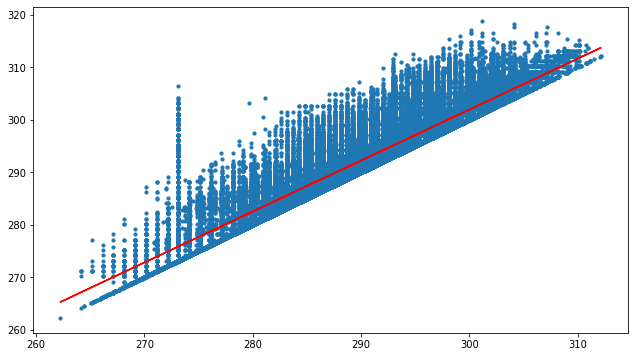

In [129]:
# графік тренувального набору + передбачення
plt.figure(figsize=(10.66,6))
plt.scatter(mydata["temp_min"],mydata["temp_max"],s=10)
plt.plot(X_train, predictions, color='red')
plt.savefig("final_graph.jpg")